In [1]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt

%matplotlib inline

ModuleNotFoundError: No module named 'tweepy'

In [4]:
#Twitter App access keys for @user

#consume:
CONSUMER_KEY = "jYG9OF8gpSQXazrHgc9QKcAFx"
CONSUMER_SECRET = "MuQ7fzSngAa6K59WSyWH16bzQT6L7kcx3KpJd0ZjAWQ8LhlPL8"
ACCESS_TOKEN = "1360194558538231808-eG1IK1GbPCIYWyTKAZtd7PJXrya4l5"
ACCESS_SECRET = "bqNi8QkoG6xC8y8AVAhgtLVEwaieCcEMmH3ZEW4U60HOq"


In [5]:
# We import our access keys:
from credentials import *    # This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [7]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="Tigo_Colombia", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 10000 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:10000]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

@fernand31043685 Nos preocupa lo que nos indicas, @fernand31043685, y estamos disponibles para solucionar tu situac… https://t.co/ocM3efohJ5

@fernand31043685 Hola, Fernando, queremos identificar qué sucede con el proceso de activación de tu plan, por tal m… https://t.co/sVgpMJDhYx

@juango_mejia Nos preocupa lo que compartes, @juanlopez4328 y queremos conocer la situación que presentas, te invit… https://t.co/LxdMnkJr8C

@SandraKta Hola, Sandra. Estamos comprometidos en brindarte la mejor experiencia 💪, recuerda que estamos a tu enter… https://t.co/DIfWsNtvcx

@HorusYesid Te pedimos disculpas por las molestias ocasionadas, @HorusYesid y queremos conocer detalles de la situa… https://t.co/FO1TtaNR5L



In [8]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,@fernand31043685 Nos preocupa lo que nos indic...
1,"@fernand31043685 Hola, Fernando, queremos iden..."
2,"@juango_mejia Nos preocupa lo que compartes, @..."
3,"@SandraKta Hola, Sandra. Estamos comprometidos..."
4,@HorusYesid Te pedimos disculpas por las moles...
5,"@JhonCaldas Hola, @edwardzm1975, lamentamos qu..."
6,@sgonzal10 Te ofrecemos disculpas por las mole...
7,"@wilberdelacruz Hola, @wilberdelacruz. Te invi..."
8,"@ImBetoSierra13 Beto, estamos a tu disposición..."
9,@ImBetoSierra13 Hola @ImBetoSierra13. Estamos ...


In [9]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [10]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1395560217652432902
2021-05-21 02:00:58
Zendesk
0
0
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'fernand31043685', 'name': 'fernando', 'id': 1352781233202356225, 'id_str': '1352781233202356225', 'indices': [0, 16]}, {'screen_name': 'fernand31043685', 'name': 'fernando', 'id': 1352781233202356225, 'id_str': '1352781233202356225', 'indices': [50, 66]}], 'urls': [{'url': 'https://t.co/ocM3efohJ5', 'expanded_url': 'https://twitter.com/i/web/status/1395560217652432902', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}


In [11]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [12]:
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,@fernand31043685 Nos preocupa lo que nos indic...,140,1395560217652432902,2021-05-21 02:00:58,Zendesk,0,0
1,"@fernand31043685 Hola, Fernando, queremos iden...",140,1395559762549477376,2021-05-21 01:59:10,Zendesk,0,0
2,"@juango_mejia Nos preocupa lo que compartes, @...",140,1395558764024053767,2021-05-21 01:55:12,Zendesk,0,0
3,"@SandraKta Hola, Sandra. Estamos comprometidos...",140,1395557029742252033,2021-05-21 01:48:18,Zendesk,0,0
4,@HorusYesid Te pedimos disculpas por las moles...,140,1395557021450215428,2021-05-21 01:48:16,Zendesk,0,0
5,"@JhonCaldas Hola, @edwardzm1975, lamentamos qu...",139,1395556327523553286,2021-05-21 01:45:31,Zendesk,0,0
6,@sgonzal10 Te ofrecemos disculpas por las mole...,140,1395555883942354946,2021-05-21 01:43:45,Zendesk,0,0
7,"@wilberdelacruz Hola, @wilberdelacruz. Te invi...",119,1395555552873357312,2021-05-21 01:42:26,Zendesk,0,0
8,"@ImBetoSierra13 Beto, estamos a tu disposición...",140,1395555062869540865,2021-05-21 01:40:29,Zendesk,0,0
9,@ImBetoSierra13 Hola @ImBetoSierra13. Estamos ...,140,1395555048093065223,2021-05-21 01:40:26,Zendesk,0,0


In [13]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 139.305


In [14]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
En el #DíaDelStreaming 💻 📱, el entretenimiento como quieras. Sí, así como lo lees. Con el nuevo Tigo ONEtv graba, r… https://t.co/pYk0EtDXtB
Number of likes: 5
140 characters.

The tweet with more retweets is: 
En el #DíaDelStreaming 💻 📱, el entretenimiento como quieras. Sí, así como lo lees. Con el nuevo Tigo ONEtv graba, r… https://t.co/pYk0EtDXtB
Number of retweets: 2
140 characters.



In [24]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

AttributeError: 'numpy.datetime64' object has no attribute 'toordinal'

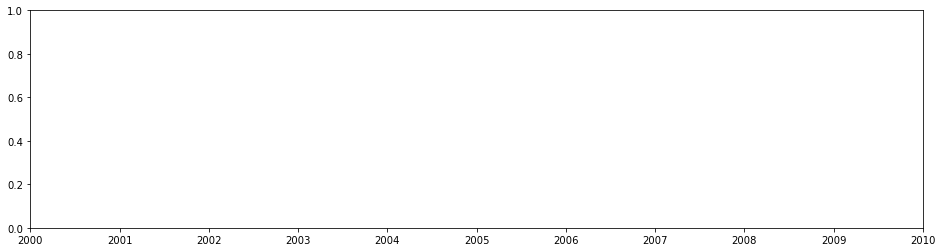

In [25]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

AttributeError: 'numpy.datetime64' object has no attribute 'toordinal'

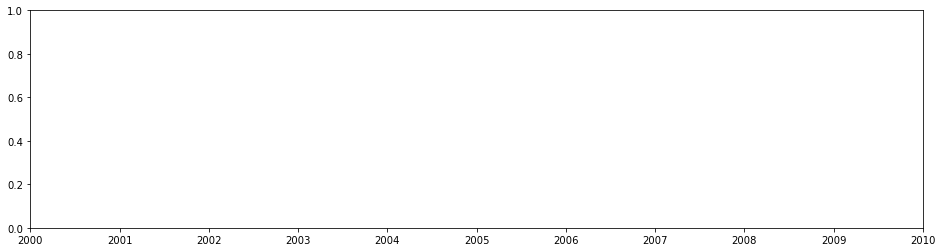

In [26]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [18]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Zendesk
* Twitter for Advertisers


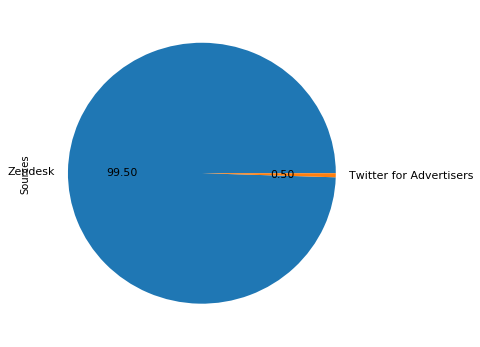

In [19]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [20]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [21]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,@fernand31043685 Nos preocupa lo que nos indic...,140,1395560217652432902,2021-05-21 02:00:58,Zendesk,0,0,0
1,"@fernand31043685 Hola, Fernando, queremos iden...",140,1395559762549477376,2021-05-21 01:59:10,Zendesk,0,0,0
2,"@juango_mejia Nos preocupa lo que compartes, @...",140,1395558764024053767,2021-05-21 01:55:12,Zendesk,0,0,0
3,"@SandraKta Hola, Sandra. Estamos comprometidos...",140,1395557029742252033,2021-05-21 01:48:18,Zendesk,0,0,0
4,@HorusYesid Te pedimos disculpas por las moles...,140,1395557021450215428,2021-05-21 01:48:16,Zendesk,0,0,0
5,"@JhonCaldas Hola, @edwardzm1975, lamentamos qu...",139,1395556327523553286,2021-05-21 01:45:31,Zendesk,0,0,0
6,@sgonzal10 Te ofrecemos disculpas por las mole...,140,1395555883942354946,2021-05-21 01:43:45,Zendesk,0,0,0
7,"@wilberdelacruz Hola, @wilberdelacruz. Te invi...",119,1395555552873357312,2021-05-21 01:42:26,Zendesk,0,0,0
8,"@ImBetoSierra13 Beto, estamos a tu disposición...",140,1395555062869540865,2021-05-21 01:40:29,Zendesk,0,0,0
9,@ImBetoSierra13 Hola @ImBetoSierra13. Estamos ...,140,1395555048093065223,2021-05-21 01:40:26,Zendesk,0,0,0


In [22]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [23]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 1.0%
Percentage of neutral tweets: 99.0%
Percentage de negative tweets: 0.0%
